zad. 1 Piotr Pawłowski

In [171]:
import numpy as np
from scipy import integrate
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
def f1(x):
    return ((np.e)**(-(x**2)))*((np.log(x))**2)
def f2(x):
    return 1/(x**3-2*x-5)
def f3(x):
    return (x**5)*(np.e**(-x))*np.sin(x)
def f4(x,y):
    return 1/((np.sqrt(x+y))*(1+x+y)) 
def f5(x,y):
    return (x**2)+(y**2) 

Text(0.5, 0, 's')

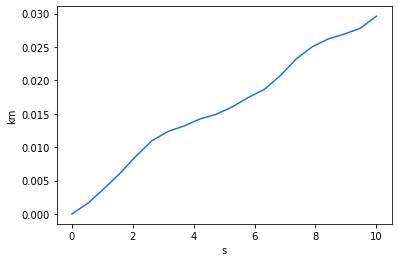

In [172]:
def road(speed,time):
    coef=1/3600
    time=time*(coef)
    return integrate.cumtrapz(speed,time)
v=[np.random.uniform(0,20) for i in range(20)]
time=np.linspace(0,10,20)
speed=np.array(v)
y=np.append(np.array(0),road(speed,time))
plt.plot(time,y)
plt.ylabel('km')
plt.xlabel('s')

zad. 2

In [173]:
def comp_simpson(x,y):
    h=x[1]-x[0]
    integral=0
    for i in range(2,len(y)):
        integral+=(y[i-2]+4*y[i-1]+y[i])*h/6
    return integral
def get_integrate_data(f,int_beg,int_end,num_of_points):
    x=np.linspace(int_beg,int_end,num_of_points)
    y=np.array([f(x1) for x1 in x] )
    return x,y
def plot_f_error(f):
    diff=[]
    step=2
    for i in range(10,100,step):
        x,y=get_integrate_data(f,1,11,i)
        diff.append(np.abs(comp_simpson(x,y)-integrate.simpson(y,x)))
    plt.plot([i for i in range(10,100,step)],diff)

Wykres błędu dla f1

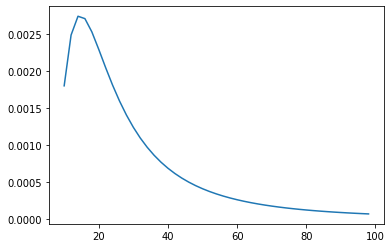

In [174]:
plot_f_error(f1)

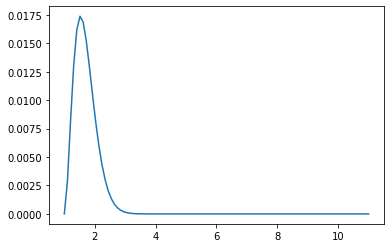

In [159]:
#wykres f1
x,y=get_integrate_data(f1,1,11,i)
plt.plot(x,y)

Wykres błędu dla f2

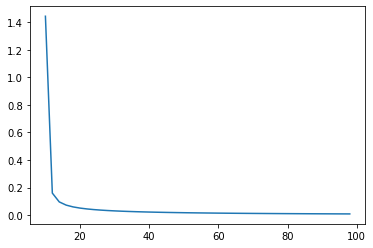

In [150]:
plot_f_error(f2)

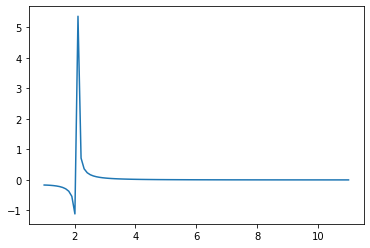

In [158]:
# wykres f2
x,y=get_integrate_data(f2,1,11,100)
plt.plot(x,y)

Wykres błędu dla f3

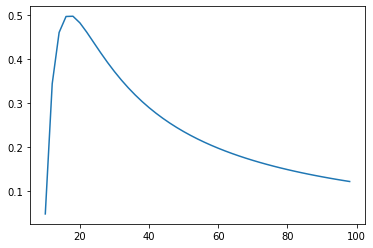

In [152]:
plot_f_error(f3)

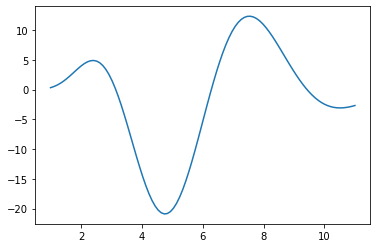

In [157]:
# wykres f3
x,y=get_integrate_data(f3,1,11,100)
plt.plot(x,y)

zad. 3a

In [89]:
f = lambda x, y: 1/(np.sqrt(x+y)*(1+x+y))
print(integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1-x))

(0.4292036732051043, 2.1056482296104932e-08)


<ipython-input-182-9051aa3065d2>:3: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(np.sqrt(x+y)*(1+x+y))


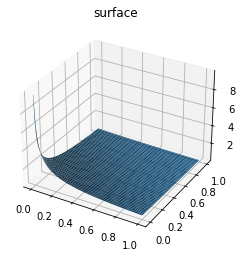

In [182]:
#wykres całkowanej funkcji
def z_function(x, y):
    return 1/(np.sqrt(x+y)*(1+x+y))
X=np.linspace(0,1,100)
Y=np.linspace(0,1,100)
X,Y=np.meshgrid(X,Y)
Z = z_function(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_title('surface');
plt.show()

3b

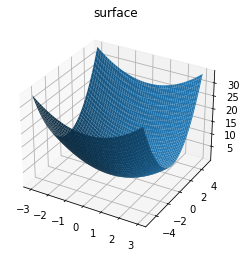

In [191]:
#wykres całkowanej funkcji
def z_function(x, y):
    return x**2+y**2
X=np.linspace(-3,3,100)
Y=np.linspace(-5,5,100)
X,Y=np.meshgrid(X,Y)
Z = z_function(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_title('surface');
plt.show()

In [245]:
f = lambda x, y: x**2+y**2
def double_trapz(n):#n-bok siatki
    x_min,x_max,n_points_x = (-3,3,n)
    y_min,y_max,n_points_y = (-5,5,n)
    x = np.linspace(x_min,x_max,n_points_x)
    y = np.linspace(y_min,y_max,n_points_y)
    zz = f(x.reshape(-1,1),y.reshape(1,-1))
    return np.trapz([np.trapz(zz_x,x) for zz_x in zz],y)
acc_val=integrate.dblquad(f, -3, 3, lambda x: -5, lambda x: 5)[0]
print('dokladna wartosc wynosi: ',acc_val)

dokladna wartosc wynosi:  680.0


wykres błędu

696.7901234567902


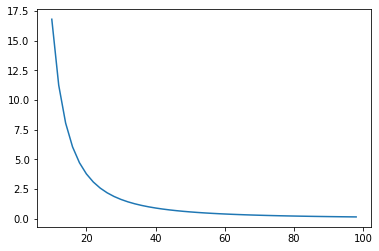

In [249]:
print(double_trapz(10))
err=[]
for i in range(10,100,2):
    err.append(np.abs(acc_val-double_trapz(i)))
plt.plot([i for i in range(10,100,2)],err)